# 导入数据

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## 展示数据

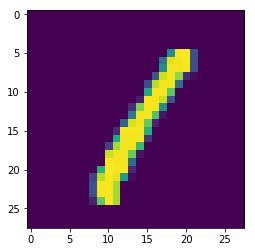

In [6]:
img=mnist.train.images[3]
plt.imshow(img.reshape((28,28)))

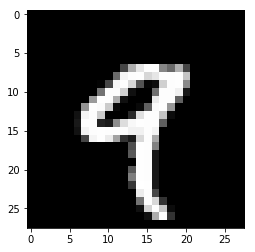

In [5]:
img2=mnist.train.images[4]
plt.imshow(img2.reshape((28,28)),cmap='Greys_r')

# 构造编码器

In [7]:
encoding_dim=32

In [10]:
image_size=mnist.train.images.shape[1]
image_size

784

## 下面开始构造数据流图

In [15]:
inputs_=tf.placeholder(tf.float32,[None,784],name='inputs')
targets_=tf.placeholder(tf.float32,[None,784],name='targets')

encoded=tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)
logits=tf.layers.dense(encoded,image_size,activation=None)
decoded=tf.nn.sigmoid(logits)

In [25]:
loss=tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)

In [26]:
cost=tf.reduce_mean(loss)

In [28]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# 训练

In [29]:
epochs=10
batch_size=64

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epo in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch=mnist.train.next_batch(batch_size)
            feed={inputs_:batch[0],targets_:batch[0]}
            batch_cost,_=sess.run([cost,optimizer],feed_dict=feed)
           
            print("Epoch: {}/{}...".format(epo+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))
            
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
    in_imgs = mnist.test.images[:10]
    reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

    for images, row in zip([in_imgs, reconstructed], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((28, 28)), cmap='Greys_r')      ##????
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    fig.tight_layout(pad=0.1)

# 检查结果

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')      ##????
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)